In [1]:
# For data manipulation
import pandas as pd              

# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [2]:
orders = pd.read_csv('../input/instacart-market-basket-analysis/orders.csv')
order_products_train = pd.read_csv('../input/instacart-market-basket-analysis/order_products__train.csv')
order_products_prior = pd.read_csv('../input/instacart-market-basket-analysis/order_products__prior.csv')
products = pd.read_csv('../input/instacart-market-basket-analysis/products.csv')
aisles = pd.read_csv('../input/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('../input/instacart-market-basket-analysis/departments.csv')

In [3]:
'''
#### Remove triple quotes to trim your dataset and experiment with your data
### COMMANDS FOR CODING TESTING - Get 10% of users 
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] 
'''

'\n#### Remove triple quotes to trim your dataset and experiment with your data\n### COMMANDS FOR CODING TESTING - Get 10% of users \norders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] \n'

In [4]:
# We convert character variables into category. 
# In Python, a categorical variable is called category and has a fixed number of different values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [5]:
#Merge the orders DF with order_products_prior by their order_id, keep only these rows with order_id that they are appear on both DFs
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [6]:
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1
op5 = op[op.order_number_back <= 5]
op5.head()
last_five = op5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five = last_five.reset_index()
last_five.head(10)

,user_id,product_id,times_last5
0,1,196,5
1,1,10258,5
2,1,12427,5
3,1,13032,2
4,1,25133,5
5,1,35951,1
6,1,38928,1
7,1,39657,1
8,1,46149,3
9,1,49235,2


In [7]:
last5_ratio = op5.groupby(['user_id','product_id'])[['order_id']].count()
last5_ratio.columns = ['times_last5_ratio']
last5_ratio = last5_ratio[['times_last5_ratio']] / 5
last5_ratio = last5_ratio.reset_index()
last5_ratio.head()

,user_id,product_id,times_last5_ratio
0,1,196,1.0
1,1,10258,1.0
2,1,12427,1.0
3,1,13032,0.4
4,1,25133,1.0


In [8]:
last_five = last_five.merge(last5_ratio, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio
0,1,196,5,1.0
1,1,10258,5,1.0
2,1,12427,5,1.0
3,1,13032,2,0.4
4,1,25133,5,1.0


In [9]:
del [op5, last5_ratio]

In [10]:
days_since_last_order = op.groupby(['user_id','product_id'])[['days_since_prior_order']].count()
days_since_last_order.columns = ['days_since_last_order'] 
days_since_last_order = days_since_last_order.reset_index() 
days_since_last_order.head(50)

,user_id,product_id,days_since_last_order
0,1,196,9
1,1,10258,9
2,1,10326,1
3,1,12427,9
4,1,13032,3
5,1,13176,2
6,1,14084,0
7,1,17122,1
8,1,25133,8
9,1,26088,1


In [11]:
days_since_last_order.head(50)

,user_id,product_id,days_since_last_order
0,1,196,9
1,1,10258,9
2,1,10326,1
3,1,12427,9
4,1,13032,3
5,1,13176,2
6,1,14084,0
7,1,17122,1
8,1,25133,8
9,1,26088,1


In [12]:
max_days_since_last_order = op.groupby(['user_id','product_id'])[['days_since_prior_order']].max()
max_days_since_last_order.columns = ['max_days_since_last'] 
max_days_since_last_order = max_days_since_last_order.reset_index() 
max_days_since_last_order.head(50)

,user_id,product_id,max_days_since_last
0,1,196,30.0
1,1,10258,30.0
2,1,10326,28.0
3,1,12427,30.0
4,1,13032,30.0
5,1,13176,28.0
6,1,14084,NaN
7,1,17122,28.0
8,1,25133,30.0
9,1,26088,15.0


In [13]:
max_days_since_last_order.head(50)

,user_id,product_id,max_days_since_last
0,1,196,30.0
1,1,10258,30.0
2,1,10326,28.0
3,1,12427,30.0
4,1,13032,30.0
5,1,13176,28.0
6,1,14084,NaN
7,1,17122,28.0
8,1,25133,30.0
9,1,26088,15.0


In [14]:
days_since_last_order = days_since_last_order.merge(max_days_since_last_order, on=['user_id', 'product_id'], how='left')
days_since_last_order.head(50)

,user_id,product_id,days_since_last_order,max_days_since_last
0,1,196,9,30.0
1,1,10258,9,30.0
2,1,10326,1,28.0
3,1,12427,9,30.0
4,1,13032,3,30.0
5,1,13176,2,28.0
6,1,14084,0,NaN
7,1,17122,1,28.0
8,1,25133,8,30.0
9,1,26088,1,15.0


In [15]:
days_since_last_order = days_since_last_order.fillna(0)
days_since_last_order.head(50)

,user_id,product_id,days_since_last_order,max_days_since_last
0,1,196,9,30.0
1,1,10258,9,30.0
2,1,10326,1,28.0
3,1,12427,9,30.0
4,1,13032,3,30.0
5,1,13176,2,28.0
6,1,14084,0,0.0
7,1,17122,1,28.0
8,1,25133,8,30.0
9,1,26088,1,15.0


In [16]:
del [max_days_since_last_order]

In [17]:
prr = op.groupby('product_id').filter(lambda x: x.shape[0] >40)
prr = op.groupby('product_id')['reordered'].mean().to_frame('product_reordered_ratio') #
prr.head()

,product_reordered_ratio
product_id,
1,0.613391
2,0.133333
3,0.732852
4,0.446809
5,0.600000


In [18]:
prr = prr.reset_index()
prr.head(50)

,product_id,product_reordered_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000
5,6,0.375000
6,7,0.400000
7,8,0.503030
8,9,0.525641
9,10,0.506998


In [19]:
user = op.groupby('user_id')['order_number'].max().to_frame('u_total_orders')
user = user.reset_index()
user.head()

,user_id,u_total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [20]:
urr = op.groupby('user_id')['reordered'].mean().to_frame('user_reordered_ratio') #
urr = urr.reset_index()
urr.head()

,user_id,user_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [21]:
user = user.merge(urr, on='user_id', how='left')

del urr
gc.collect()

user.head() 

,user_id,u_total_orders,user_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [22]:
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought')
uxp.head()

uxp_total_bought
user_id product_id                  
1       196                       10
        10258                      9
        10326                      1
        12427                     10
        13032                      3

In [23]:
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [24]:
times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
1       196                     10
        10258                    9
        10326                    1
        12427                   10
        13032                    3

In [25]:
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [26]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [27]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [28]:
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [29]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,1,196,10,10,1,10
1,1,10258,9,10,2,9
2,1,10326,1,10,5,6
3,1,12427,10,10,1,10
4,1,13032,3,10,2,9


In [30]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,1,196,10,10,1,10,1.000000
1,1,10258,9,10,2,9,1.000000
2,1,10326,1,10,5,6,0.166667
3,1,12427,10,10,1,10,1.000000
4,1,13032,3,10,2,9,0.333333


In [31]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [32]:
del [times, first_order_no, span]

In [33]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [34]:
uxp = uxp.merge(days_since_last_order, on=['user_id', 'product_id'], how='left')

del days_since_last_order
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last
0,1,196,10,1.000000,9,30.0
1,1,10258,9,1.000000,9,30.0
2,1,10326,1,0.166667,1,28.0
3,1,12427,10,1.000000,9,30.0
4,1,13032,3,0.333333,3,30.0


In [35]:
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')

del [last_five]
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio
0,1,196,10,1.000000,9,30.0,5.0,1.0
1,1,10258,9,1.000000,9,30.0,5.0,1.0
2,1,10326,1,0.166667,1,28.0,NaN,NaN
3,1,12427,10,1.000000,9,30.0,5.0,1.0
4,1,13032,3,0.333333,3,30.0,2.0,0.4


In [36]:
uxp = uxp.fillna(0)
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio
0,1,196,10,1.000000,9,30.0,5.0,1.0
1,1,10258,9,1.000000,9,30.0,5.0,1.0
2,1,10326,1,0.166667,1,28.0,0.0,0.0
3,1,12427,10,1.000000,9,30.0,5.0,1.0
4,1,13032,3,0.333333,3,30.0,2.0,0.4


In [37]:
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915


In [38]:
data = data.merge(prr, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.776480
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915,0.713772
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.652009
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.740735
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915,0.657158


In [39]:
del op, user, prr, uxp
gc.collect()

200

In [40]:
## First approach:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

## Second approach (if you want to test it you have to re-run the notebook):
# In one step keep only the future orders from all customers: train & test 
#orders_future = orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')), ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

## Third approach (if you want to test it you have to re-run the notebook):
# In one step exclude all the prior orders so to deal with the future orders from all customers
#orders_future = orders.loc[orders.eval_set!='prior', ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
53,6,test,1528013
74,7,train,525192
78,8,train,880375
82,9,train,1094988
88,10,train,1822501


In [41]:
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio,eval_set,order_id
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.776480,train,1187899
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915,0.713772,train,1187899
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.652009,train,1187899
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.740735,train,1187899
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915,0.657158,train,1187899
5,1,13176,2,0.222222,2,28.0,0.0,0.0,10,0.694915,0.832555,train,1187899
6,1,14084,1,0.100000,0,0.0,0.0,0.0,10,0.694915,0.810982,train,1187899
7,1,17122,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.675576,train,1187899
8,1,25133,8,1.000000,8,30.0,5.0,1.0,10,0.694915,0.740155,train,1187899
9,1,26088,2,0.200000,1,15.0,0.0,0.0,10,0.694915,0.539041,train,1187899


In [42]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train'] #
data_train.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio,eval_set,order_id
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.776480,train,1187899
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915,0.713772,train,1187899
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.652009,train,1187899
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.740735,train,1187899
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915,0.657158,train,1187899


In [43]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.652009,train,1187899,NaN
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.740735,train,1187899,NaN
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,2,28.0,0.0,0.0,10,0.694915,0.832555,train,1187899,NaN
6,1,14084,1,0.100000,0,0.0,0.0,0.0,10,0.694915,0.810982,train,1187899,NaN
7,1,17122,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.675576,train,1187899,NaN
8,1,25133,8,1.000000,8,30.0,5.0,1.0,10,0.694915,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,1,15.0,0.0,0.0,10,0.694915,0.539041,train,1187899,1.0


In [44]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,9,30.0,5.0,1.0,10,0.694915,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.652009,train,1187899,0.0
3,1,12427,10,1.000000,9,30.0,5.0,1.0,10,0.694915,0.740735,train,1187899,0.0
4,1,13032,3,0.333333,3,30.0,2.0,0.4,10,0.694915,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,2,28.0,0.0,0.0,10,0.694915,0.832555,train,1187899,0.0
6,1,14084,1,0.100000,0,0.0,0.0,0.0,10,0.694915,0.810982,train,1187899,0.0
7,1,17122,1,0.166667,1,28.0,0.0,0.0,10,0.694915,0.675576,train,1187899,0.0
8,1,25133,8,1.000000,8,30.0,5.0,1.0,10,0.694915,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,1,15.0,0.0,0.0,10,0.694915,0.539041,train,1187899,1.0


In [45]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
1       196                       10           1.000000   
        10258                      9           1.000000   
        10326                      1           0.166667   
        12427                     10           1.000000   
        13032                      3           0.333333   
        13176                      2           0.222222   
        14084                      1           0.100000   
        17122                      1           0.166667   
        25133                      8           1.000000   
        26088                      2           0.200000   
        26405                      2           0.200000   
        30450                      1           0.125000   
        35951                      1           1.000000   
        38928                      1           1.000000   
        39657                      1           1.000000   

                    days_since_last_order  max_days_since_last  times_last5  \
user_id product_id                                                            
1       196                             9                 30.0          5.0   
        10258                           9                 30.0          5.0   
        10326                           1                 28.0          0.0   
        12427                           9                 30.0          5.0   
        13032                           3                 30.0          2.0   
        13176                           2                 28.0          0.0   
        14084                           0                  0.0          0.0   
        17122                           1                 28.0          0.0   
        25133                           8                 30.0          5.0   
        26088                           1                 15.0          0.0   
        26405                           1                 29.0          0.0   
        30450                           1                 21.0          0.0   
        35951                           1                 30.0          1.0   
        38928                           1                 30.0          1.0   
        39657                           1                 30.0          1.0   

                    times_last5_ratio  u_total_orders  user_reordered_ratio  \
user_id product_id                                                            
1       196                       1.0              10              0.694915   
        10258                     1.0              10              0.694915   
        10326                     0.0              10              0.694915   
        12427                     1.0              10              0.694915   
        13032                     0.4              10              0.694915   
        13176                     0.0              10              0.694915   
        14084                     0.0              10              0.694915   
        17122                     0.0              10              0.694915   
        25133                     1.0              10              0.694915   
        26088                     0.0              10              0.694915   
        26405                     0.0              10              0.694915   
        30450                     0.0              10              0.694915   
        35951                     0.2              10              0.694915   
        38928                     0.2              10              0.694915   
        39657                     0.2              10              0.694915   

                    product_reordered_ratio eval_set  order_id  reordered  
user_id product_id                                                         
1       196                        0.776480    train   1187899        1.0  
        10258                      0.713772    train   1187899        1.0  
        10326           

In [46]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
1       196                       10           1.000000   
        10258                      9           1.000000   
        10326                      1           0.166667   
        12427                     10           1.000000   
        13032                      3           0.333333   
        13176                      2           0.222222   
        14084                      1           0.100000   
        17122                      1           0.166667   
        25133                      8           1.000000   
        26088                      2           0.200000   
        26405                      2           0.200000   
        30450                      1           0.125000   
        35951                      1           1.000000   
        38928                      1           1.000000   
        39657                      1           1.000000   

                    days_since_last_order  max_days_since_last  times_last5  \
user_id product_id                                                            
1       196                             9                 30.0          5.0   
        10258                           9                 30.0          5.0   
        10326                           1                 28.0          0.0   
        12427                           9                 30.0          5.0   
        13032                           3                 30.0          2.0   
        13176                           2                 28.0          0.0   
        14084                           0                  0.0          0.0   
        17122                           1                 28.0          0.0   
        25133                           8                 30.0          5.0   
        26088                           1                 15.0          0.0   
        26405                           1                 29.0          0.0   
        30450                           1                 21.0          0.0   
        35951                           1                 30.0          1.0   
        38928                           1                 30.0          1.0   
        39657                           1                 30.0          1.0   

                    times_last5_ratio  u_total_orders  user_reordered_ratio  \
user_id product_id                                                            
1       196                       1.0              10              0.694915   
        10258                     1.0              10              0.694915   
        10326                     0.0              10              0.694915   
        12427                     1.0              10              0.694915   
        13032                     0.4              10              0.694915   
        13176                     0.0              10              0.694915   
        14084                     0.0              10              0.694915   
        17122                     0.0              10              0.694915   
        25133                     1.0              10              0.694915   
        26088                     0.0              10              0.694915   
        26405                     0.0              10              0.694915   
        30450                     0.0              10              0.694915   
        35951                     0.2              10              0.694915   
        38928                     0.2              10              0.694915   
        39657                     0.2              10              0.694915   

                    product_reordered_ratio  reordered  
user_id product_id                                      
1       196                        0.776480        1.0  
        10258                      0.713772        1.0  
        10326                      0.652009        0.0  
        12427                      0.740735

In [47]:
data_test = data[data.eval_set=='test'] #
data_test.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,days_since_last_order,max_days_since_last,times_last5,times_last5_ratio,u_total_orders,user_reordered_ratio,product_reordered_ratio,eval_set,order_id
120,3,248,1,0.090909,1,9.0,0.0,0.0,12,0.625,0.400251,test,2774568
121,3,1005,1,0.333333,1,17.0,1.0,0.2,12,0.625,0.440605,test,2774568
122,3,1819,3,0.333333,3,20.0,0.0,0.0,12,0.625,0.492162,test,2774568
123,3,7503,1,0.100000,1,21.0,0.0,0.0,12,0.625,0.553551,test,2774568
124,3,8021,1,0.090909,1,9.0,0.0,0.0,12,0.625,0.591157,test,2774568


In [48]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id']) #
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
3       248                        1           0.090909   
        1005                       1           0.333333   
        1819                       3           0.333333   
        7503                       1           0.100000   
        8021                       1           0.090909   

                    days_since_last_order  max_days_since_last  times_last5  \
user_id product_id                                                            
3       248                             1                  9.0          0.0   
        1005                            1                 17.0          1.0   
        1819                            3                 20.0          0.0   
        7503                            1                 21.0          0.0   
        8021                            1                  9.0          0.0   

                    times_last5_ratio  u_total_orders  user_reordered_ratio  \
user_id product_id                                                            
3       248                       0.0              12                 0.625   
        1005                      0.2              12                 0.625   
        1819                      0.0              12                 0.625   
        7503                      0.0              12                 0.625   
        8021                      0.0              12                 0.625   

                    product_reordered_ratio eval_set  order_id  
user_id product_id                                              
3       248                        0.400251     test   2774568  
        1005                       0.440605     test   2774568  
        1819                       0.492162     test   2774568  
        7503                       0.553551     test   2774568  
        8021                       0.591157     test   2774568

In [49]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
3       248                        1           0.090909   
        1005                       1           0.333333   
        1819                       3           0.333333   
        7503                       1           0.100000   
        8021                       1           0.090909   

                    days_since_last_order  max_days_since_last  times_last5  \
user_id product_id                                                            
3       248                             1                  9.0          0.0   
        1005                            1                 17.0          1.0   
        1819                            3                 20.0          0.0   
        7503                            1                 21.0          0.0   
        8021                            1                  9.0          0.0   

                    times_last5_ratio  u_total_orders  user_reordered_ratio  \
user_id product_id                                                            
3       248                       0.0              12                 0.625   
        1005                      0.2              12                 0.625   
        1819                      0.0              12                 0.625   
        7503                      0.0              12                 0.625   
        8021                      0.0              12                 0.625   

                    product_reordered_ratio  
user_id product_id                           
3       248                        0.400251  
        1005                       0.440605  
        1819                       0.492162  
        7503                       0.553551  
        8021                       0.591157

[14:07:28] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


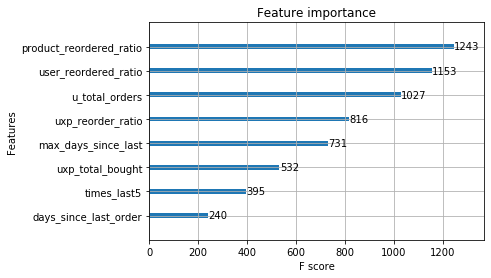

In [50]:
# TRAIN FULL 
###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb

##########################################
## SPLIT DF TO: X_train, y_train (axis=1)
##########################################
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered

########################################
## SET BOOSTER'S PARAMETERS
########################################
parameters = {'eval_metric':'logloss', 
              'max_depth':'5', 
              'colsample_bytree':'0.4',
              'subsample':'0.75'
             }

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

########################################
## TRAIN MODEL
########################################
model = xgbc.fit(X_train, y_train)

##################################
# FEATURE IMPORTANCE - GRAPHICAL
##################################
xgb.plot_importance(model)

In [51]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None,
 'parameters': {'eval_metric': 'logloss',
  'max_depth': '5',
  'colsample_bytree': '0.4',
  'subsample': '0.75'},
 'num_boost_round': 10}

In [52]:
###########################
## DISABLE WARNINGS
###########################
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

####################################
## SET BOOSTER'S RANGE OF PARAMETERS
# IMPORTANT NOTICE: Fine-tuning an XGBoost model may be a computational prohibitive process with a regular computer or a Kaggle kernel. 
# Be cautious what parameters you enter in paramiGrid section.
# More paremeters means that GridSearch will create and evaluate more models.
####################################    
paramGrid = {"max_depth":[5,10],
            "colsample_bytree":[0.3,0.4]}  

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=10)

##############################################
## DEFINE HOW TO TRAIN THE DIFFERENT MODELS
#############################################
gridsearch = GridSearchCV(xgbc, paramGrid, cv=3, verbose=2, n_jobs=1)

################################################################
## TRAIN THE MODELS
### - with the combinations of different parameters
### - here is where GridSearch will be exeucuted
#################################################################
model = gridsearch.fit(X_train, y_train)

##################################
## OUTPUT(S)
##################################
# Print the best parameters
print("The best parameters are: /n",  gridsearch.best_params_)

# Store the model for prediction (chapter 5)
model = gridsearch.best_estimator_

# Delete X_train , y_train
del [X_train, y_train]


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.3, max_depth=5 ...............................
[14:29:49] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[CV] ................ colsample_bytree=0.3, max_depth=5, total= 5.2min
[CV] colsample_bytree=0.3, max_depth=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s


[14:34:58] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[CV] ................ colsample_bytree=0.3, max_depth=5, total= 5.2min
[CV] colsample_bytree=0.3, max_depth=5 ...............................
[14:40:11] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[CV] ................ colsample_bytree=0.3, max_depth=5, total= 5.2min
[CV] colsample_bytree=0.3, max_depth=10 ..............................
[14:45:21] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[CV] ............... colsample_bytree=0.3, max_depth=10, total= 8

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 87.8min finished


[15:57:34] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
The best parameters are: /n {'colsample_bytree': 0.4, 'max_depth': 5}


In [53]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None,
 'eval_metric': 'logloss',
 'num_boost_round': 10}

In [54]:
# Predict values for test data with our model from chapter 5 - the results are saved as a Python array
test_pred = model.predict(data_test).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [55]:
## OR set a custom threshold (in this problem, 0.21 yields the best prediction)
test_pred = (model.predict_proba(data_test)[:,1] >= 0.21).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [56]:
#Save the prediction in a new column in the data_test DF
data_test['prediction'] = test_pred
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
3       248                        1           0.090909   
        1005                       1           0.333333   
        1819                       3           0.333333   
        7503                       1           0.100000   
        8021                       1           0.090909   

                    days_since_last_order  max_days_since_last  times_last5  \
user_id product_id                                                            
3       248                             1                  9.0          0.0   
        1005                            1                 17.0          1.0   
        1819                            3                 20.0          0.0   
        7503                            1                 21.0          0.0   
        8021                            1                  9.0          0.0   

                    times_last5_ratio  u_total_orders  user_reordered_ratio  \
user_id product_id                                                            
3       248                       0.0              12                 0.625   
        1005                      0.2              12                 0.625   
        1819                      0.0              12                 0.625   
        7503                      0.0              12                 0.625   
        8021                      0.0              12                 0.625   

                    product_reordered_ratio  prediction  
user_id product_id                                       
3       248                        0.400251           0  
        1005                       0.440605           0  
        1819                       0.492162           0  
        7503                       0.553551           0  
        8021                       0.591157           0

In [57]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns to create our submission file (Chapter 6)
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head()

,product_id,user_id,prediction
0,248,3,0
1,1005,3,0
2,1819,3,0
3,7503,3,0
4,8021,3,0


In [58]:
orders_test = orders.loc[orders.eval_set=='test',("user_id", "order_id") ]
orders_test.head()

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845


In [59]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

,product_id,user_id,prediction,order_id
0,248,3,0,2774568
1,1005,3,0,2774568
2,1819,3,0,2774568
3,7503,3,0,2774568
4,8021,3,0,2774568


In [60]:
#remove user_id column
final = final.drop('user_id', axis=1)
#convert product_id as integer
final['product_id'] = final.product_id.astype(int)

#Remove all unnecessary objects
del orders
del orders_test
gc.collect()

final.head()

,product_id,prediction,order_id
0,248,0,2774568
1,1005,0,2774568
2,1819,0,2774568
3,7503,0,2774568
4,8021,0,2774568


In [61]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

{2774568: '17668 18599 21903 22035 39190 43961 47766',
 1528013: '21903 38293',
 1376945: '8309 13176 14947 17706 24799 27959 28465 33572 34658 35948 44632',
 1356845: '7076 10863 11520 13176 14992',
 2161313: '196 10441 11266 12427 14715 27839 37710',
 1416320: '5134 17948 21137 21903 24561 24852 41950',
 1735923: '196 2192 12108 15131 17008 31487 34690 35123',
 1980631: '6184 9387 13575 13914 22362 41400 46061',
 139655: '13176 21903 22935 24964 27845 32655',
 1411408: '22008',
 2940603: '10339 14947 18531 19894 30592 31615 44632',
 1192143: '24852',
 280888: '19213 32566 41406',
 3202221: '4793 9637 10831 11130 13629 17630 21137 21927 24852 27966 39911 45364 45774 46979 49215',
 3222866: '7039 7969 8501 13187 14283 14947 15718 18894 32441 32912 33198 34254 35921 37131 38690 40706',
 707453: '694 4942 6111 8518 18150 21137 21267 21903 24852 25826 26209 28156 32030 37766 39275 42585 44142 44830 45066 46802 47766 48230',
 1320132: '44632',
 882556: '1870 3583 5373 5450 7371 8424 9076 1

In [62]:
#Convert the dictionary into a DataFrame
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

,order_id,products
0,2774568,17668 18599 21903 22035 39190 43961 47766
1,1528013,21903 38293
2,1376945,8309 13176 14947 17706 24799 27959 28465 33572...
3,1356845,7076 10863 11520 13176 14992
4,2161313,196 10441 11266 12427 14715 27839 37710


In [63]:
#Check if sub file has 75000 predictions
sub.shape[0]
print(sub.shape[0]==75000)

True


In [64]:
sub.to_csv('sub.csv', index=False)